# Analyzing GDP per capita, Share of agricultural employment, and education.
Using data from WDI and ILOSTAT.

In [2]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Import data
data_WB = pd.read_excel('Data\P_Data_Extract_From_World_Development_Indicators.xlsx')
data_UNDP = pd.read_csv('Data\HDR21-22_Composite_indices_complete_time_series.csv')

In [4]:
data_WB.head()

,Country Name,Country Code,Series Name,Series Code,1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,64.771185,65.059005,65.186009,65.169112,65.061514,65.187699,...,50.416688,47.697315,44.798594,44.593516,44.337137,43.989031,44.4536,45.01604,45.983408,46.587823
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,2122.830759,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1516.273265
2,Albania,ALB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,53.198792,52.987349,52.735871,52.413215,52.203394,51.75494,...,45.995631,44.198027,42.257063,41.283525,40.040852,38.078346,37.285732,36.416856,36.190744,35.640848
3,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,3264.836677,3598.827815,3921.634093,4471.623506,4908.956329,4400.334211,...,11228.005157,11361.307891,11586.873945,11878.495523,12291.901997,12771.054137,13317.1842,13653.248783,13278.434516,14596.015558
4,Algeria,DZA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,23.967045,23.853056,23.734053,23.556856,23.372809,23.075537,...,10.755027,10.753295,9.746314,8.834767,8.535155,10.16129,10.092127,9.798442,10.023791,10.033098


In [5]:
data_WB['Series Name'].unique()

array(['Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'GDP per capita, PPP (constant 2017 international $)', nan],
      dtype=object)

In [6]:
data_UNDP.head()

,iso3,country,mys_1992,mys_1993,mys_1994,mys_1995,mys_1996,mys_1997,mys_1998,mys_1999,...,mys_2012,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021
0,AFG,Afghanistan,1.067586,1.115817,1.164047,1.212277,1.251383,1.290489,1.329594,1.368700,...,2.209473,2.261614,2.313755,2.365896,2.463660,2.561425,2.659189,2.756953,2.854718,2.985070
1,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.393500,...,3.909642,3.950166,3.990690,4.704040,5.417391,5.417391,5.417391,5.417391,5.417391,5.417391
2,ALB,Albania,7.350875,7.348996,7.347118,7.345239,7.627026,7.908813,8.190599,8.472386,...,10.025110,10.196281,10.370374,10.547439,10.727528,10.910692,11.096983,11.286455,11.286455,11.286455
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.587085,10.616062,10.645040,10.573280,10.556100,10.555773,10.555446,10.555120,10.555120,10.555120
4,ARE,United Arab Emirates,6.357381,6.656119,6.954857,7.253594,7.499132,7.744670,7.990207,8.235745,...,10.169965,10.338129,10.506293,10.674456,10.842620,12.055400,12.484000,12.694030,12.694030,12.694030


## Cleaning and merging data

In [7]:
### Pivot the WB data. Have each Series as a column.
## First, create two new dataframes. One for each series.
## GDP
GDP_DF = data_WB[data_WB['Series Name'] == 'GDP per capita, PPP (constant 2017 international $)']

## Agricultural Employment
Agri_Emp_DF = data_WB[data_WB['Series Name'] == 'Employment in agriculture (% of total employment) (modeled ILO estimate)']

In [8]:
## Have each year as a row.
GDP_DF = GDP_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'GDP')
Agri_Emp_DF = Agri_Emp_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'Agri_Emp')
Edu_DF = data_UNDP.melt(id_vars = ['iso3', 'country'], var_name = 'Year', value_name = 'Year_Schooling')

In [9]:
Agri_Emp_DF

,Country Name,Country Code,Series Name,Series Code,Year,Agri_Emp
0,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,1992 [YR1992],64.771185
1,Albania,ALB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,1992 [YR1992],53.198792
2,Algeria,DZA,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,1992 [YR1992],23.967045
3,American Samoa,ASM,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,1992 [YR1992],..
4,Andorra,AND,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,1992 [YR1992],..
...,...,...,...,...,...,...
6505,Virgin Islands (U.S.),VIR,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2021 [YR2021],1.344809
6506,West Bank and Gaza,PSE,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2021 [YR2021],6.661146
6507,"Yemen, Rep.",YEM,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2021 [YR2021],29.829385
6508,Zambia,ZMB,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,2021 [YR2021],57.788508


In [10]:
## Keep only the first 4 characters of the year.
GDP_DF['Year'] = GDP_DF['Year'].str[:4]
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].str[:4]
# for the UNDP data, the year is the last 4 characters
Edu_DF['Year'] = Edu_DF['Year'].str[-4:]

## Convert the year to integer.
GDP_DF['Year'] = GDP_DF['Year'].astype(int)
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].astype(int)
Edu_DF['Year'] = Edu_DF['Year'].astype(int)

In [11]:
Edu_DF

,iso3,country,Year,Year_Schooling
0,AFG,Afghanistan,1992,1.067586
1,AGO,Angola,1992,NaN
2,ALB,Albania,1992,7.350875
3,AND,Andorra,1992,NaN
4,ARE,United Arab Emirates,1992,6.357381
...,...,...,...,...
6175,ZZG.ECA,Europe and Central Asia,2021,10.553922
6176,ZZH.LAC,Latin America and the Caribbean,2021,8.997700
6177,ZZI.SA,South Asia,2021,6.710321
6178,ZZJ.SSA,Sub-Saharan Africa,2021,6.001639


In [12]:
GDP_DF

,Country Name,Country Code,Series Name,Series Code,Year,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
1,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,3264.836677
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8471.527605
3,American Samoa,ASM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
...,...,...,...,...,...,...
6505,Virgin Islands (U.S.),VIR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,..
6506,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,5641.0444
6507,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,..
6508,Zambia,ZMB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,3287.420524


In [13]:
### Merge all dataframes.
ALL_VAR_DF = GDP_DF.merge(Agri_Emp_DF[['Country Name', 'Year', 'Agri_Emp']], on = ['Country Name', 'Year'], how = 'left')
ALL_VAR_DF = ALL_VAR_DF.merge(Edu_DF[['country', 'Year', 'Year_Schooling']], left_on = ['Country Name', 'Year'], right_on = ['country', 'Year'], how = 'left')

In [14]:
## Convert GDP, Proportion_Upper_Sec and Agri_Emp to numeric.
ALL_VAR_DF['GDP'] = pd.to_numeric(ALL_VAR_DF['GDP'], errors = 'coerce')
ALL_VAR_DF['Year_Schooling'] = pd.to_numeric(ALL_VAR_DF['Year_Schooling'], errors = 'coerce')
ALL_VAR_DF['Agri_Emp'] = pd.to_numeric(ALL_VAR_DF['Agri_Emp'], errors = 'coerce')

In [15]:
ALL_VAR_DF[ALL_VAR_DF['Country Name'] == 'Thailand']

,Country Name,Country Code,Series Name,Series Code,Year,GDP,Agri_Emp,country,Year_Schooling
192,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8277.353327,61.853402,Thailand,4.743107
409,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1993,8830.575053,58.245099,Thailand,4.860802
626,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1994,9401.065289,57.796830,Thailand,4.978497
843,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1995,10025.087936,54.004983,Thailand,5.096192
1060,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1996,10453.389428,52.028325,Thailand,5.209179
1277,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1997,10035.869947,52.503689,Thailand,5.322166
1494,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1998,9156.214446,54.070747,Thailand,5.435153
1711,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1999,9467.921239,51.692419,Thailand,5.548140
1928,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2000,9791.895971,51.663772,Thailand,5.661128
2145,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2001,10036.329469,47.581161,Thailand,6.044813


In [16]:
### Create Dataframe containing countries which had similar level of GDP as Thailand in 1992
Thai_GDP_1992 = ALL_VAR_DF[(ALL_VAR_DF['Country Name'] == 'Thailand') & (ALL_VAR_DF['Year'] == 1992)]['GDP'].values[0]
range_gdp = [Thai_GDP_1992 *0.75, Thai_GDP_1992 * 1.25]

## Get names of countries with similar level of GDP as Thailand in 1992.
Similar_GDP_Countries = ALL_VAR_DF[(ALL_VAR_DF['GDP'] >= range_gdp[0]) & (ALL_VAR_DF['GDP'] <= range_gdp[1]) & (ALL_VAR_DF['Year'] == 1992)]['Country Name'].unique()

Similar_GDP_Countries

array(['Algeria', 'Belarus', 'Belize', 'Botswana', 'Brazil', 'Colombia',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'Fiji', 'Grenada', 'Iran, Islamic Rep.', 'Jamaica', 'Jordan',
       'Lebanon', 'Mauritius', 'Namibia', 'North Macedonia', 'Paraguay',
       'South Africa', 'St. Vincent and the Grenadines', 'Thailand'],
      dtype=object)

In [17]:
### Create Dataframe containing countries which had similar level of Educational Attainment as Thailand in 1992
Thai_Edu_1992 = ALL_VAR_DF[(ALL_VAR_DF['Country Name'] == 'Thailand') & (ALL_VAR_DF['Year'] == 1992)]['Year_Schooling'].values[0]
range_edu = [Thai_Edu_1992 *0.80, Thai_Edu_1992 * 1.2]

## Get names of countries with similar level of GDP as Thailand in 1992.
Similar_Edu_Countries = ALL_VAR_DF[(ALL_VAR_DF['Year_Schooling'] >= range_edu[0]) & (ALL_VAR_DF['Year_Schooling'] <= range_edu[1]) & (ALL_VAR_DF['Year'] == 1992)]['Country Name'].unique()

Similar_Edu_Countries

array(['Algeria', 'Bahrain', 'Brazil', 'China', 'Dominican Republic',
       'El Salvador', 'Gabon', 'Guyana', 'Honduras', 'Iraq', 'Jordan',
       'Kenya', 'Lesotho', 'Libya', 'Maldives', 'Nicaragua',
       'North Macedonia', 'Portugal', 'Sao Tome and Principe',
       'Syrian Arab Republic', 'Thailand', 'Viet Nam', 'Zambia',
       'Zimbabwe'], dtype=object)

In [18]:
## Create Dataframe containing countries in Similar_GDP_Countries.
Similar_Countries_DF_GDP = ALL_VAR_DF[ALL_VAR_DF['Country Name'].isin(Similar_GDP_Countries)]

In [19]:
Similar_Countries_DF_GDP

,Country Name,Country Code,Series Name,Series Code,Year,GDP,Agri_Emp,country,Year_Schooling
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8471.527605,23.967045,Algeria,5.046033
17,Belarus,BLR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,7923.649887,23.239002,Belarus,NaN
19,Belize,BLZ,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,7607.846370,28.263280,Belize,5.790401
25,Botswana,BWA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,9570.428758,15.953245,Botswana,5.996000
26,Brazil,BRA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,10103.787943,18.910836,Brazil,3.977296
...,...,...,...,...,...,...,...,...,...
6438,North Macedonia,MKD,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,16708.597701,11.130733,North Macedonia,10.228150
6446,Paraguay,PRY,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,13676.390207,19.714269,Paraguay,8.861840
6470,South Africa,ZAF,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,13337.790130,21.277695,South Africa,11.373160
6477,St. Vincent and the Grenadines,VCT,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,13839.464052,10.034518,NaN,NaN


In [20]:
## Create Dataframe containing countries in Similar_Edu_Countries.
Similar_Countries_DF_EDU = ALL_VAR_DF[ALL_VAR_DF['Country Name'].isin(Similar_Edu_Countries)]

Similar_Countries_DF_EDU

,Country Name,Country Code,Series Name,Series Code,Year,GDP,Agri_Emp,country,Year_Schooling
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8471.527605,23.967045,Algeria,5.046033
14,Bahrain,BHR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,40971.726502,2.315193,Bahrain,5.682497
26,Brazil,BRA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,10103.787943,18.910836,Brazil,3.977296
41,China,CHN,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,1731.657216,58.500123,China,4.500742
56,Dominican Republic,DOM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,6688.870434,21.626891,Dominican Republic,5.528540
...,...,...,...,...,...,...,...,...,...
6482,Syrian Arab Republic,SYR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,NaN,15.887182,Syrian Arab Republic,5.100000
6485,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,17087.210954,31.897322,Thailand,8.697120
6504,Viet Nam,VNM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,10628.219611,29.044345,Viet Nam,8.370280
6508,Zambia,ZMB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2021,3287.420524,57.788508,Zambia,7.187091


In [21]:
Similar_Countries_DF_EDU[Similar_Countries_DF_EDU['Country Name'] == 'Thailand']

,Country Name,Country Code,Series Name,Series Code,Year,GDP,Agri_Emp,country,Year_Schooling
192,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8277.353327,61.853402,Thailand,4.743107
409,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1993,8830.575053,58.245099,Thailand,4.860802
626,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1994,9401.065289,57.796830,Thailand,4.978497
843,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1995,10025.087936,54.004983,Thailand,5.096192
1060,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1996,10453.389428,52.028325,Thailand,5.209179
1277,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1997,10035.869947,52.503689,Thailand,5.322166
1494,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1998,9156.214446,54.070747,Thailand,5.435153
1711,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1999,9467.921239,51.692419,Thailand,5.548140
1928,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2000,9791.895971,51.663772,Thailand,5.661128
2145,Thailand,THA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2001,10036.329469,47.581161,Thailand,6.044813


## Plotting

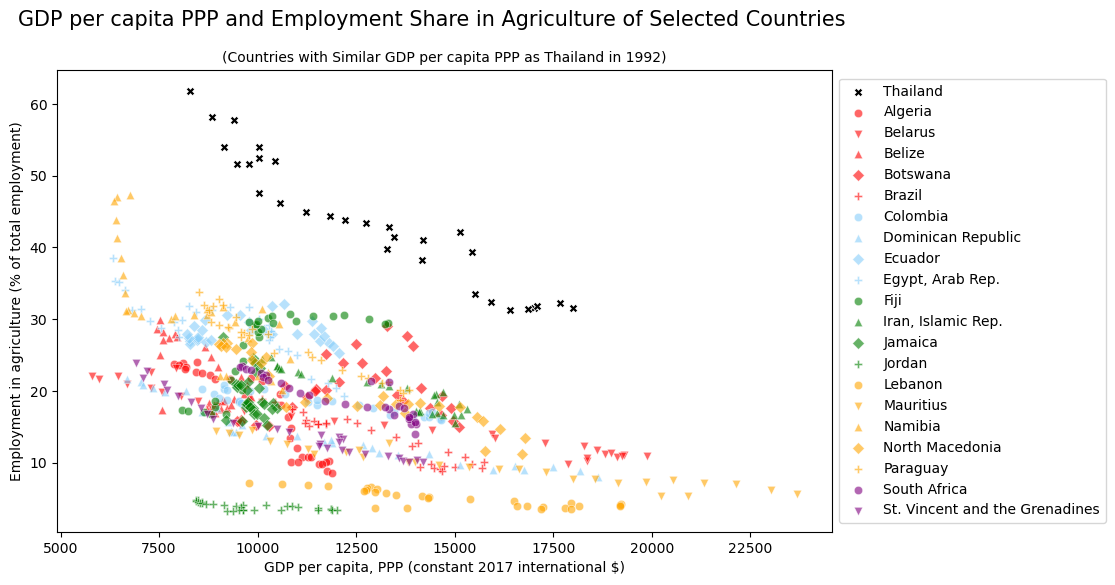

In [35]:
### Scatter GDP and Agricultural Employment for all countries in Similar_Countries_DF_GDP. 
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == "Thailand"], x = 'GDP', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == country], x = 'GDP', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Employment in agriculture (% of total employment)')

# Add title
plt.suptitle('GDP per capita PPP and Employment Share in Agriculture of Selected Countries', fontsize = 15)
plt.title('(Countries with Similar GDP per capita PPP as Thailand in 1992)', fontsize = 10)


# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


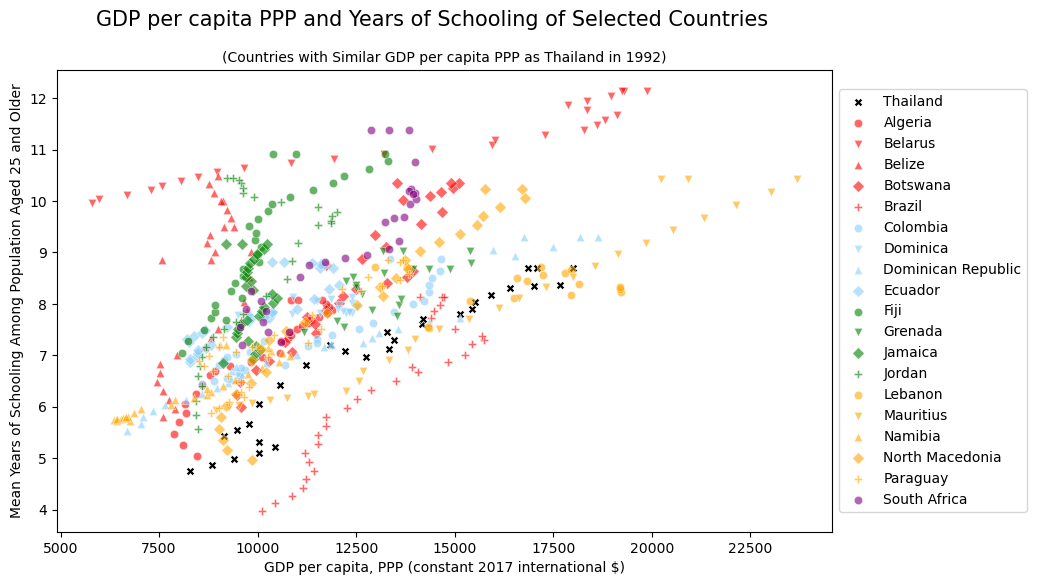

In [36]:
### Scatter GDP and Edu for all countries in Similar_Countries_DF_GDP.
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == "Thailand"], x = 'GDP', y = 'Year_Schooling' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_GDP[Similar_Countries_DF_GDP["Country Name"] == country], x = 'GDP', y = 'Year_Schooling', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Mean Years of Schooling Among Population Aged 25 and Older')

# Add title
plt.suptitle('GDP per capita PPP and Years of Schooling of Selected Countries', fontsize = 15)
plt.title('(Countries with Similar GDP per capita PPP as Thailand in 1992)', fontsize = 10)

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

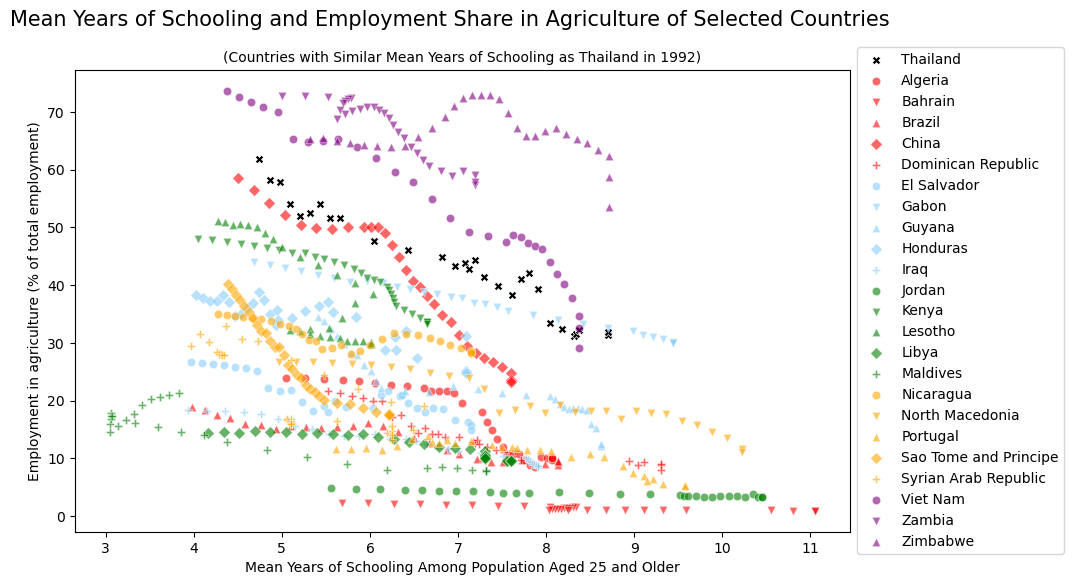

In [37]:
### Scatter Edu and Agricultural Employment.
plt.figure(figsize = (10, 6))

### Plot Thailand differently with a different marker.
sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == "Thailand"], x = 'Year_Schooling', y = 'Agri_Emp' ,marker='X', color = 'black', label = "Thailand")

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'teal', 'gold']
markers = ['o', 'v', '^', 'D', 'P']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

# Plot
for i, country in enumerate(Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] != "Thailand"]['Country Name'].unique()):
    sns.scatterplot(data = Similar_Countries_DF_EDU[Similar_Countries_DF_EDU["Country Name"] == country], x = 'Year_Schooling', y = 'Agri_Emp', marker = color_marker_combinations[i][1], color = color_marker_combinations[i][0], alpha = 0.60, label = country)


# Axes labels
plt.xlabel('Mean Years of Schooling Among Population Aged 25 and Older')
plt.ylabel('Employment in agriculture (% of total employment)')

# Add title
plt.suptitle('Mean Years of Schooling and Employment Share in Agriculture of Selected Countries', fontsize = 15)
plt.title('(Countries with Similar Mean Years of Schooling as Thailand in 1992)', fontsize = 10)

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))